Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


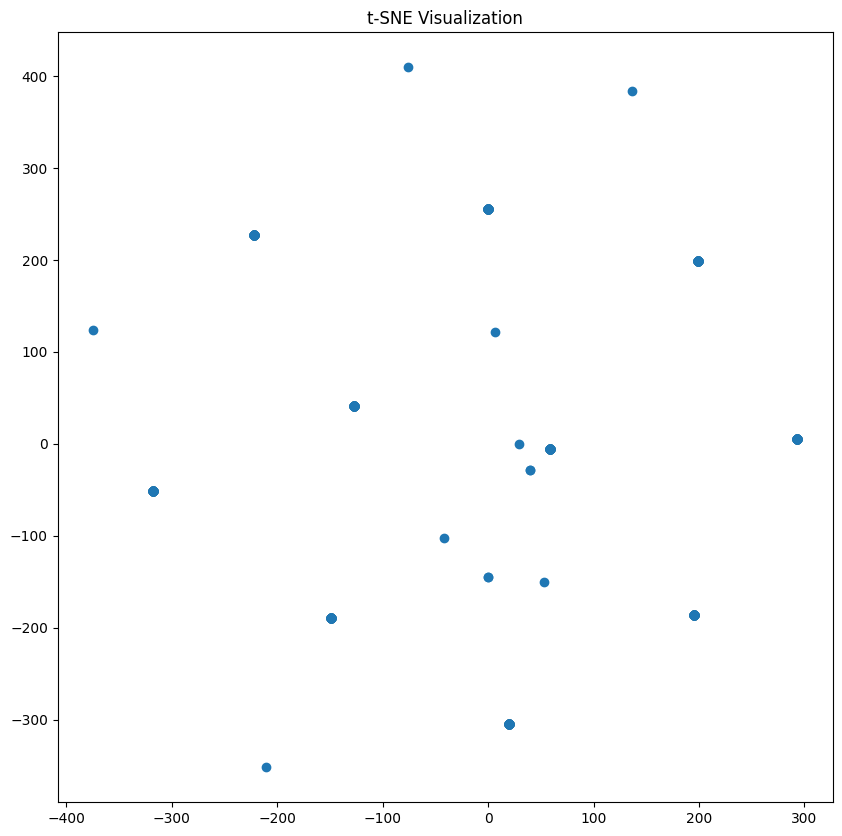

Accuracy: 93.55%
Precision: 0.7920
Recall: 0.7922
F1 Score: 0.7911
Accuracy: 79.28%


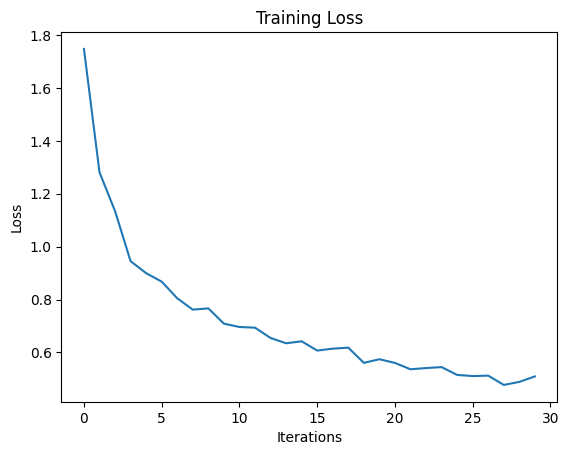

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.manifold import TSNE

# Set device configuration (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transforms and load the CIFAR-10 dataset
transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=128, shuffle=False, num_workers=2
)

# Define the CNN model
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)

# Train the model or load pre-trained parameters
train_model = False  # Set to False if you want to load pre-trained parameters

if train_model:
    # Train the model
    model.train()
    train_losses = []
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:
                train_loss = running_loss / 100
                print(f"[Epoch {epoch+1}, Batch {i+1}] Loss: {train_loss:.3f}")
                train_losses.append(train_loss)
                running_loss = 0.0

    # Save the trained model
    torch.save(model.state_dict(), "trained_model.pth")
else:
    # Load the pre-trained model
    model.load_state_dict(torch.load("trained_model.pth"))

# Evaluate the model
model.eval()
y_true = []
y_pred = []
embeddings = []
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

        # Extract embeddings
        features = model.fc.weight.data.cpu().numpy()
        embeddings.append(features)

# Convert the embeddings list to a numpy array
embeddings = np.concatenate(embeddings)

# Apply t-SNE for visualization
tsne = TSNE(n_components=2)
embedded_data = tsne.fit_transform(embeddings)

# Plot t-SNE visualization
plt.figure(figsize=(10, 10))
for i in range(len(embedded_data)):
    x, y = embedded_data[i, 0], embedded_data[i, 1]
    label = y_true[i]
    plt.scatter(x, y, c=label, cmap='tab10')
plt.title("t-SNE Visualization")
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average="macro")
recall = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")
# accuracy = (precision * recall) / ((precision * recall) + ((1 - precision) * (1 - recall)))
# print("Accuracy: %.2f%%" % (accuracy * 100))
print("Precision: %.4f" % precision)
print("Recall: %.4f" % recall)
print("F1 Score: %.4f" % f1)

# Compute accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print("Accuracy: %.2f%%" % (accuracy * 100))

# Plot the training loss
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

100%|██████████| 170498071/170498071 [00:02<00:00, 73264067.06it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 68.7MB/s]


[Epoch 1, Batch 100] Loss: 1.789
[Epoch 1, Batch 200] Loss: 1.287
[Epoch 1, Batch 300] Loss: 1.141
[Epoch 2, Batch 100] Loss: 0.945
[Epoch 2, Batch 200] Loss: 0.925
[Epoch 2, Batch 300] Loss: 0.879
[Epoch 3, Batch 100] Loss: 0.800
[Epoch 3, Batch 200] Loss: 0.787
[Epoch 3, Batch 300] Loss: 0.790
[Epoch 4, Batch 100] Loss: 0.710
[Epoch 4, Batch 200] Loss: 0.704
[Epoch 4, Batch 300] Loss: 0.697
[Epoch 5, Batch 100] Loss: 0.659
[Epoch 5, Batch 200] Loss: 0.645
[Epoch 5, Batch 300] Loss: 0.644
[Epoch 6, Batch 100] Loss: 0.603
[Epoch 6, Batch 200] Loss: 0.604
[Epoch 6, Batch 300] Loss: 0.599
[Epoch 7, Batch 100] Loss: 0.576
[Epoch 7, Batch 200] Loss: 0.574
[Epoch 7, Batch 300] Loss: 0.566
[Epoch 8, Batch 100] Loss: 0.532
[Epoch 8, Batch 200] Loss: 0.523
[Epoch 8, Batch 300] Loss: 0.542
[Epoch 9, Batch 100] Loss: 0.506
[Epoch 9, Batch 200] Loss: 0.521
[Epoch 9, Batch 300] Loss: 0.502
[Epoch 10, Batch 100] Loss: 0.488
[Epoch 10, Batch 200] Loss: 0.493
[Epoch 10, Batch 300] Loss: 0.474


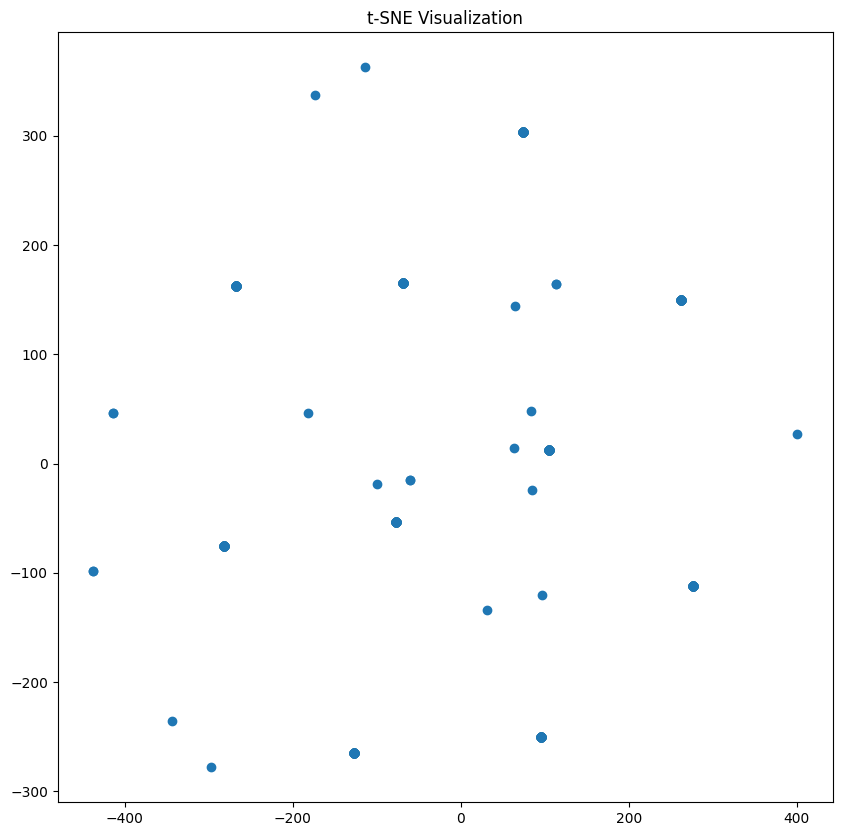

Precision: 0.7998
Recall: 0.7986
F1 Score: 0.7985
Accuracy: 79.57%
Confusion Matrix:
[[809  11  31  17  24   3   2   9  69  25]
 [ 15 855   5   5   0   2   8   2  31  77]
 [ 41   6 770  38  56  21  39  22   4   3]
 [ 13   4  64 654  58 111  45  28  10  13]
 [ 14   1  55  44 798  18  28  33   6   3]
 [  5   4  41 193  31 653  15  50   3   5]
 [  6   4  43  50  24  16 843   6   3   5]
 [ 12   1  12  45  38  27   5 844   2  14]
 [ 35  14   9  14   6   0   2   6 901  13]
 [ 28  48   3   7   1   3   4  12  35 859]]


In [1]:
# for Confusion Matrix only.

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.manifold import TSNE

# Set device configuration (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transforms and load the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=128, shuffle=False, num_workers=2
)

# Define the CNN model
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)

# Train the model or load pre-trained parameters
train_model = True  # Set to False if you want to load pre-trained parameters

if train_model:
    # Train the model
    model.train()
    train_losses = []
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:
                train_loss = running_loss / 100
                print(f"[Epoch {epoch+1}, Batch {i+1}] Loss: {train_loss:.3f}")
                train_losses.append(train_loss)
                running_loss = 0.0

    # Save the trained model
    torch.save(model.state_dict(), "trained_model.pth")
else:
    # Load the pre-trained model
    model.load_state_dict(torch.load("trained_model.pth"))

# Evaluate the model
model.eval()
y_true = []
y_pred = []
embeddings = []
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

        # Extract embeddings
        features = model.fc.weight.data.cpu().numpy()
        embeddings.append(features)

# Convert the embeddings list to a numpy array
embeddings = np.concatenate(embeddings)

# Apply t-SNE for visualization
tsne = TSNE(n_components=2)
embedded_data = tsne.fit_transform(embeddings)

# Plot t-SNE visualization
plt.figure(figsize=(10, 10))
for i in range(len(embedded_data)):
    x, y = embedded_data[i, 0], embedded_data[i, 1]
    label = y_true[i]
    plt.scatter(x, y, c=label, cmap='tab10')
plt.title("t-SNE Visualization")
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average="macro")
recall = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")
print("Precision: %.4f" % precision)
print("Recall: %.4f" % recall)
print("F1 Score: %.4f" % f1)

# Compute accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print("Accuracy: %.2f%%" % (accuracy * 100))

# Compute and display confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)
